In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pymongo as pm
import numpy as np
import h5py
import scipy as sp
import scipy.stats as stats
import os

In [2]:
import tensorflow as tf
from models import alexnet

In [3]:
STIM_PATH="/share/kalanit/biac2/kgs/projects/Dawn/CS431/data/full_res/"

In [4]:
#testing with one training set (sets of 120 images)
with h5py.File(os.path.join(STIM_PATH,"Stimuli_Trn_FullRes_01.mat"),'r') as f:
    stim_set1 = f['stimTrn'][:]

In [5]:
stim_set1.shape

(500, 500, 120)

In [6]:
#make the actual pixel values match the alexnet training images
stim_set1 = stim_set1+.5

#transpose the images so that they make sense
stim_set1 = stim_set1.T
stim_set1.shape

(120, 500, 500)

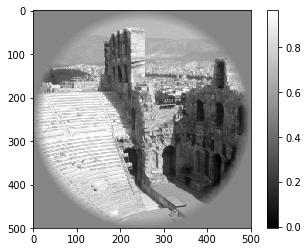

In [7]:
plt.imshow(stim_set1[10,:,:], cmap = "gray")
plt.colorbar()

In [8]:
#add pretend color channels
N = stim_set1[:,:,:,np.newaxis]
stim_set1_rgb = np.tile(N,(1,1,1,3))
stim_set1_rgb.shape

(120, 500, 500, 3)

In [9]:
#Alexnet checkpoint
LOAD_PATH = "checkpoints/model.ckpt-115000"

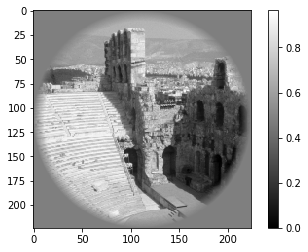

In [10]:
#create image tensor
images = stim_set1_rgb
image_tensor = tf.convert_to_tensor(images, dtype=tf.float32)
#resize for alexnet
resized_images = tf.image.resize_images(image_tensor, (224, 224))

#quick sanity check to make sure we didn't mess anything up resizing
with tf.Session() as sess:
    plt.imshow(sess.run(resized_images[10,:,:,:]),cmap = "gray")
    plt.colorbar()
    plt.show()

In [11]:
# initialize model
convnet = alexnet(resized_images)

In [12]:
# define output tensors of interest
conv3_outputs = convnet.layers['conv3']

# initialize tf Session and restore weighs
sess = tf.Session()
tf_saver_restore = tf.train.Saver()
tf_saver_restore.restore(sess, LOAD_PATH)


INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt-115000


In [13]:
# run whatever tensors we care about
conv3_outputs = sess.run(conv3_outputs)
print(conv3_outputs.shape)

(120, 14, 14, 384)


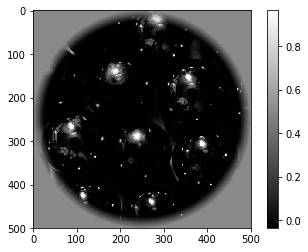

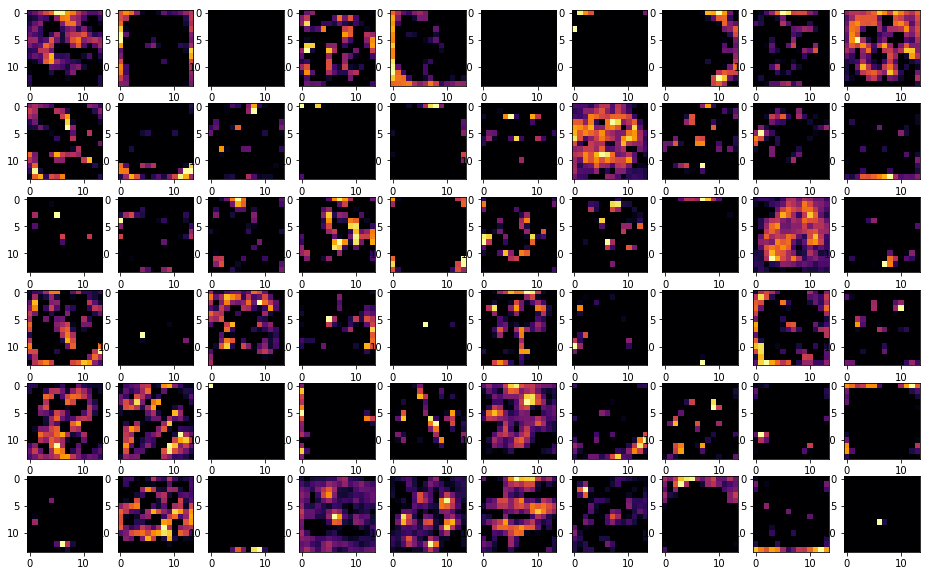

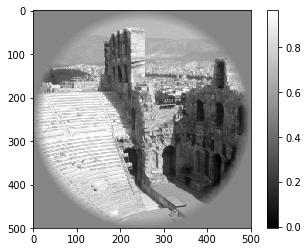

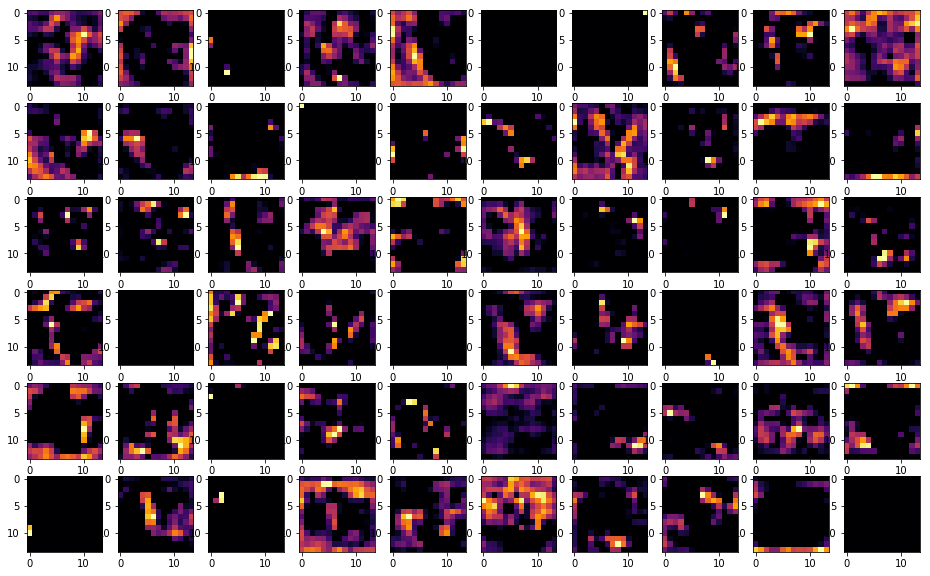

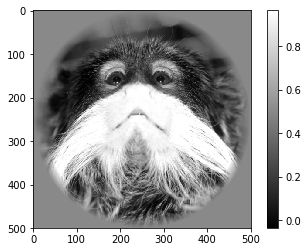

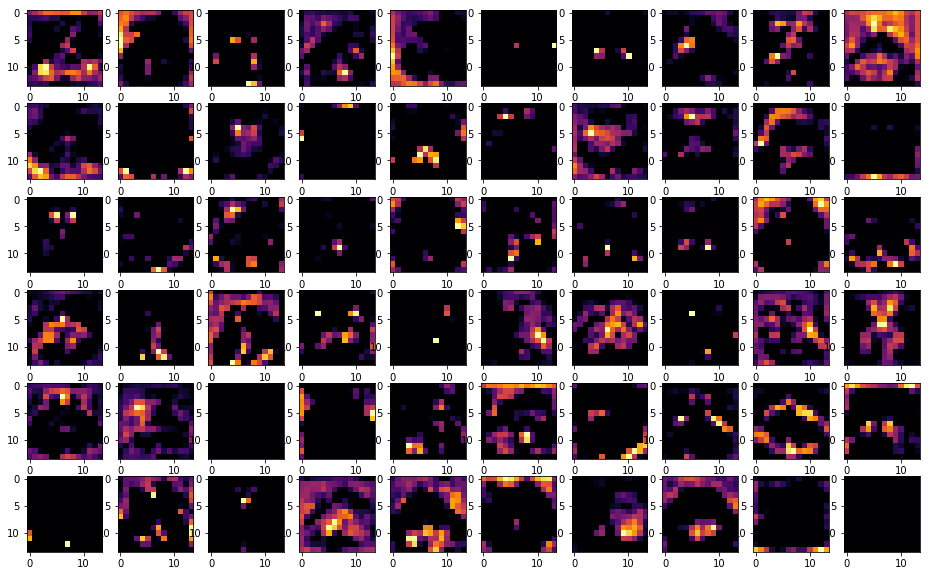

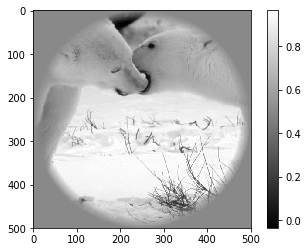

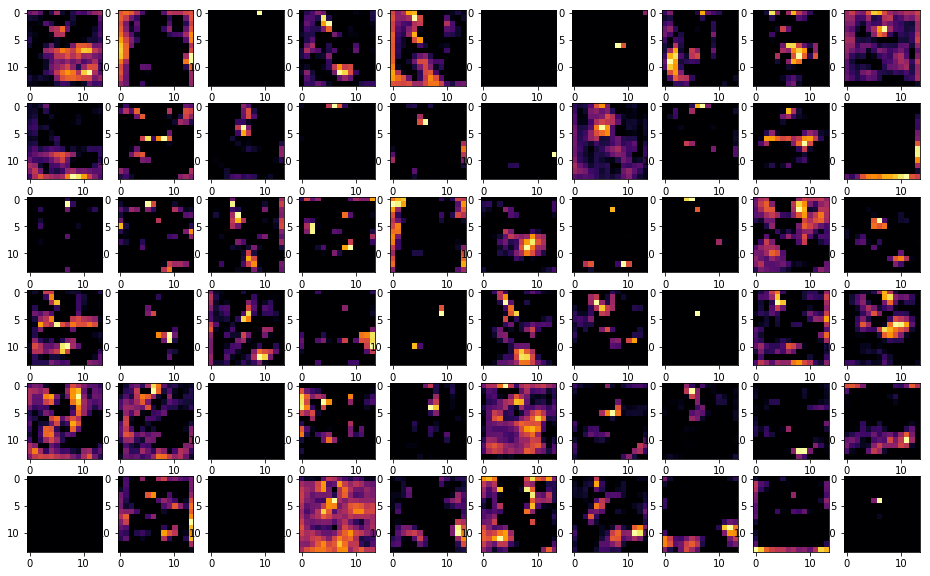

In [15]:
#visualize some features for kicks
for image_idx in [1, 10, 36, 100]:
    plt.figure()
    #let's pick 'starry night'
    plt.imshow(stim_set1[image_idx,:,:], cmap = "gray")
    plt.colorbar()

    fav_image = conv3_outputs[image_idx,:,:,:]
    fav_image = np.moveaxis(fav_image, -1, 0) #put num of features in first column

    fig = plt.figure(figsize=(16,10))

    for idx in xrange(60):
        ax = fig.add_subplot(6, 10, idx+1) 
        ax.imshow(fav_image[idx,:,:], cmap="inferno") 
    #excellent we have logical features